# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 <b>
### owned: 
a. yes 
b. 0 missing values 
c. na 
### make_model:
a. yes
b. 0 missing
c. na
### review_month:
a. no
b. 0 missing
c. str striped numbers left of -
### web_broswer:
a.no
b. 150 missing
c. fillna with "unknown"
### reviewer_age:
a. no
b. 105 occurances of '-', missing numeric values
c. strip "-" and convert to numeric and calculate mean and fillna with mean 
### primary_use:
a. yes
b. 0 missing
c. NA
### value_for_money:
a.no
b.0 missing
c. string replaced "/10" with '' so as to only kept the numerator number
### overall_rating:
a. yes
b. 0 
c. NA

In [57]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [58]:

df = pd.read_csv('electric_bike_ratings_2212.csv')


In [59]:
df.shape

(1500, 8)

In [60]:
df.dtypes

owned                int64
make_model          object
review_month        object
web_browser         object
reviewer_age        object
primary_use         object
value_for_money     object
overall_rating     float64
dtype: object

In [61]:
df.isna().sum()

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64

In [62]:
df['owned']=df['owned'].astype('category')

In [63]:
df['review_month']=df['review_month'].str.lstrip('1234567890-')

In [64]:
df["web_browser"]=df["web_browser"].fillna("unknown")

In [65]:
df['reviewer_age']=df['reviewer_age'].str.strip('-')

In [66]:
df["reviewer_age"]=pd.to_numeric(df["reviewer_age"])

In [67]:
mean_val=df["reviewer_age"].mean()

In [68]:
df["reviewer_age"]=df["reviewer_age"].fillna(value=mean_val)

In [69]:
df['value_for_money']=df['value_for_money'].str.replace("/10", '')

In [70]:
df["value_for_money"]=df["value_for_money"].fillna(0)

In [71]:
df['primary_use'].value_counts()

Commuting    1095
Leisure       405
Name: primary_use, dtype: int64

In [72]:
df.dtypes

owned              category
make_model           object
review_month         object
web_browser          object
reviewer_age        float64
primary_use          object
value_for_money      object
overall_rating      float64
dtype: object

## Task 2
a. For the ownded category, the owners (labeled as 1) has more observations, 890 compared with 610 observations by the non-owners, labled as 0. 
b. not balanced

In [73]:
df["owned"].value_counts()

1    890
0    610
Name: owned, dtype: int64

<AxesSubplot: >

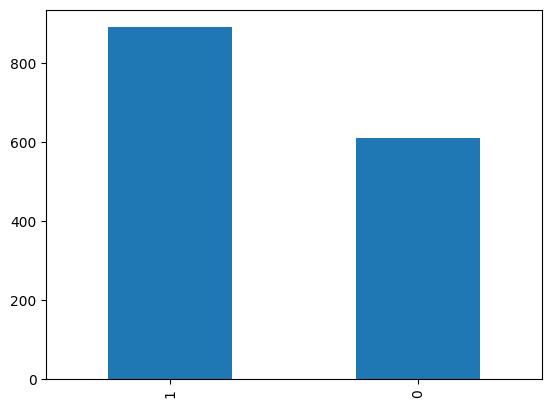

In [74]:
df["owned"].value_counts().plot(kind="bar")

## Task 3
The  distribution is skewed left,more review scores are on the higher end.

<AxesSubplot: ylabel='Frequency'>

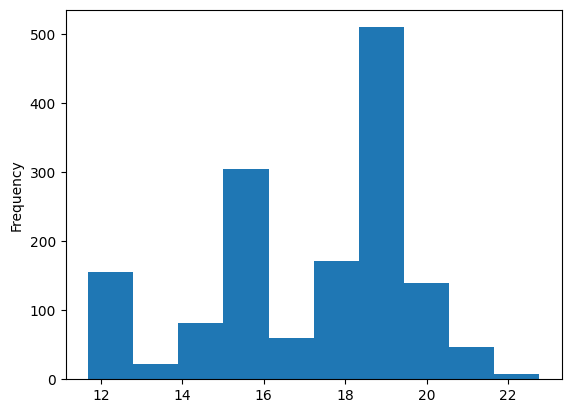

In [75]:
df["overall_rating"].plot(kind="hist")

## Task 4
Layered histogram and boxplots both show owned reviews appear to have higher overall ratings on average.

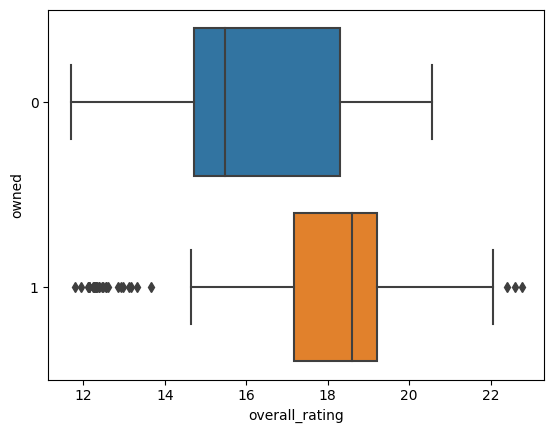

In [76]:
sns.boxplot(data=df, x="overall_rating", y="owned")
plt.show()

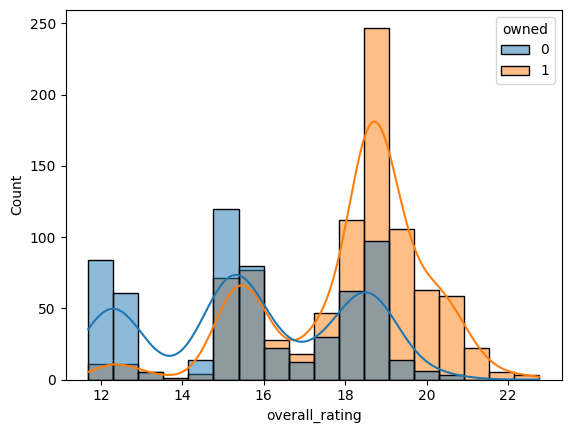

In [77]:
sns.histplot(data=df, x="overall_rating", hue="owned", kde=True)
plt.show()

## Task 5
Prediction of owned or not is classification problem, which is a type of supervised machine learning problem.

In [78]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [79]:
df["make_model"]=df["make_model"].astype("category")
df["primary_use"]=df["primary_use"].astype("category")
df["review_month"]=df["review_month"].astype("category")
df["web_browser"]=df["web_browser"].astype("category")
df["value_for_money"]=df["value_for_money"].apply(pd.to_numeric)
df["owned"]=df["owned"].apply(pd.to_numeric)
le=preprocessing.LabelEncoder()

df["make_model_enc"]=le.fit_transform(df["make_model"])
df["primary_use_enc"]=le.fit_transform(df["primary_use"])
df["review_month_enc"]=le.fit_transform(df["review_month"])
df["web_browser_enc"]=le.fit_transform(df["web_browser"])

## Task 6
We use Decision Tree Classifier as base model. To improve performance we have used GridSearch to find best parameters and used it to fit dt. 

In [93]:
dt=DecisionTreeClassifier()


In [81]:
X=df[["make_model_enc","primary_use_enc","review_month_enc","web_browser_enc","value_for_money","overall_rating"]]
y=df["owned"]

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)
params_dt={'max_depth':[1,2,3,4,5,6,], 'min_samples_leaf':[0.04,0.06,0.08,0.1,0.12,0.14], 'max_features':[0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
grid_dt=GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=1)
grid_dt.fit(X_train,y_train)
best_params=grid_dt.best_params_


In [82]:
best_params

{'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.04}

In [83]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.8, min_samples_leaf=0.04)

In [84]:
grid_dt.best_score_

0.7483333333333333

## Task 7
We are using a RandomForestClassifier as comparison model.We used GridSearch to find best hyperparameters and fitted rf with best params.

In [87]:
rf=RandomForestClassifier()


params_rf={'n_estimators':[100,200,300,400,500], 'max_depth':[3,4,5,6,7], 'min_samples_leaf':[0.1,0.15,0.2], 'max_features':['log2','sqrt']}
grid_rf=GridSearchCV(estimator=rf, param_grid=params_rf, cv=3, scoring="accuracy", verbose=1, n_jobs=1)
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [89]:
grid_rf.best_params_

{'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'n_estimators': 100}

## Task 8
reason chose base: decision trees are the easiest to understand, they are trees with  branches and leaves. Where branches meet is a node, which is also a decision point. 
reason chose comparison: randomforest model is an ensemble of many trees. 

## Task 9
compare performance: after hyperparameter tuning, the decision tree model performed slightly better than random forest. The metric we used is acurracy score. But they are very close. 

In [91]:
grid_dt.best_score_

0.7483333333333333

In [92]:
grid_rf.best_score_

0.7308333333333333

## Task 10
Decision Tree model performed better with accuracy over RandomForestClassifier. 

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam